In [2]:
#!pip install pytesseract


In [11]:
## Employing OCR for text recognition

In [20]:
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt

In [21]:
# Specify the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [22]:
## Load model

In [23]:
# using YOLOv8 nano
from ultralytics import YOLO

model = YOLO('./license_plate_model.pt')

print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [24]:
def predict_and_plot(path_test_car):
    
    results = model.predict(path_test_car, device='cpu')
    
    image = cv2.imread(path_test_car)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    
    for result in results:
        for box in result.boxes:
            
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # crop img
            roi = image[y1:y2, x1:x2]

        # Perform OCR on the cropped image
            text = pytesseract.image_to_string(roi, config='--psm 6')
            print(f"Detected text: {text}")

    
    plt.imshow(image)
    plt.axis('off') 
    plt.show() 


In [25]:
img_path='./dataset\\images\\Cars425.png'



image 1/1 G:\ComputerVision_Projects\Number_Plate_Recognition\dataset\images\Cars425.png: 320x640 1 license_plate, 58.5ms
Speed: 2.6ms preprocess, 58.5ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)
Detected text: G526 JHD



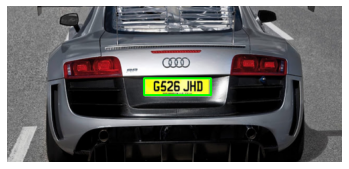

In [26]:
predict_and_plot(img_path)
